In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

esperance au
samusu ws
belushya guba ru
kihei us
cape town za
thompson ca
san patricio mx
uwayl sd
praya id
matamoros mx
barrow us
victoria sc
hasaki jp
nome us
punta arenas cl
provideniya ru
busselton au
mayor pablo lagerenza py
isangel vu
palabuhanratu id
zachagansk kz
concepcion del uruguay ar
shchelyayur ru
hermanus za
thompson ca
poum nc
tokmak kg
birjand ir
elko us
tiksi ru
biak id
punta arenas cl
taolanaro mg
port moresby pg
avarua ck
scottsbluff us
punta arenas cl
moron cu
ushuaia ar
ornskoldsvik se
ushuaia ar
atuona pf
grand gaube mu
atuona pf
qaanaaq gl
vaini to
east london za
husavik is
lebu cl
vaini to
souillac mu
upernavik gl
tromso no
mataura pf
cape town za
monte alegre br
kaitangata nz
barentsburg sj
rikitea pf
ambon id
cape town za
chokurdakh ru
butaritari ki
bontang id
kiunga pg
chokurdakh ru
atuona pf
kapaa us
vaitupu wf
khatanga ru
portadown gb
male mv
busselton au
faanui pf
palmer us
sobolevo ru
bambous virieux mu
ennis ie
rikitea pf
muros es
cabo san lucas mx
port

kavieng pg
ponta do sol cv
hermanus za
mataura pf
nouadhibou mr
taolanaro mg
atuona pf
lagoa pt
north bend us
camacha pt
taolanaro mg
angoche mz
sentyabrskiy ru
mar del plata ar
petropavlovsk-kamchatskiy ru
busselton au
maragogi br
natchitoches us
punta arenas cl
busselton au
butaritari ki
avarua ck
ponta delgada pt
tsihombe mg
gizo sb
yellowknife ca
cortes ph
butaritari ki
kaitangata nz
pevek ru
rio grande pe
marabba sd
san carlos de bariloche ar
torbay ca
san luis ar
inirida co
bela pk
saskylakh ru
lichuan cn
namibe ao
port elizabeth za
torbay ca
scottsbluff us
jamestown sh
new norfolk au
qaanaaq gl
puerto leguizamo co
chichimila mx
puerto ayora ec
turukhansk ru
nizhniy kuranakh ru
el tigre ve
tsihombe mg
norman wells ca
arona es
kamenka ru
bajil ye
ahuimanu us
zorgo bf
saint-philippe re
salta ar
kasongo-lunda cd
esperance au
shimoda jp
jamestown sh
burns lake ca
bluff nz
carutapera br
quelimane mz
lebu cl
khatanga ru
noshiro jp
kieta pg
sola vu
tasiilaq gl
dzhusaly kz
matamoros mx
i

punta arenas cl
rikitea pf
new norfolk au
cape town za
faanui pf
port elizabeth za
barentsburg sj
palmer us
ushuaia ar
taolanaro mg
atuona pf
shirokiy ru
cape town za
tortoli it
obluche ru
mount isa au
rikitea pf
jamestown sh
saint george bm
grand gaube mu
port alfred za
iqaluit ca
bluff nz
norman wells ca
dalby au
busselton au
puerto maldonado pe


In [6]:
cities=[]
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

632

In [7]:
# Starting URL for Weather Map API Call.
from config import weather_api_key
from pprint import pprint
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
city='Boston'

In [8]:
#units = standard/imperial/metric/
city_url= f'{url}&APPID={weather_api_key}&q={city}'
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f0e56637d5e46d57f8cc37d34ef994e3&q=Boston


In [9]:
boston_data = requests.get(city_url)
boston_data

<Response [200]>

In [10]:
if boston_data.status_code==200:
    print(f'City Weather found')
else:
    print(f'City Weather not found')

City Weather found


In [11]:
# Get the JSON text of the 'Get' request.
boston_data=boston_data.json()
pprint(boston_data)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 42.3584, 'lon': -71.0598},
 'dt': 1634843239,
 'id': 4930956,
 'main': {'feels_like': 73.78,
          'humidity': 47,
          'pressure': 1013,
          'temp': 74.43,
          'temp_max': 77.88,
          'temp_min': 70.61},
 'name': 'Boston',
 'sys': {'country': 'US',
         'id': 2013408,
         'sunrise': 1634814253,
         'sunset': 1634853186,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 287, 'gust': 14, 'speed': 8.01}}


In [12]:
boston_data['weather'][0]['description']

'few clouds'

In [13]:
boston_data['sys']['country']

'US'

In [14]:
from datetime import datetime
date=boston_data['dt']
datetime.fromtimestamp(date)

datetime.datetime(2021, 10, 21, 14, 7, 19)

In [15]:
boston_data['coord']['lat']

42.3584

In [16]:
boston_data['main']['temp_max']

77.88

In [17]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(f'Latitude: {lat}, Longitude: {lng}, Max. Temperature: {max_temp}, Humidity: {humidity}, Clouds: {clouds}, Wind: {wind}')

Latitude: 42.3584, Longitude: -71.0598, Max. Temperature: 77.88, Humidity: 47, Clouds: 20, Wind: 8.01


In [18]:
datetime.fromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-10-21 14:07:19'

## Get the City Weather Data

Note that is possibe that some cities doesn't exist, because the city names are being generated by random numbers, and the name of those latitudes and longitudes ar being located through the citipy library and then are being searched by the API Open Weather Maps

In [19]:
city_data=[]

# Import the datetime module from the datetime library.
from datetime import datetime

# Print the beginning of the logging
print('Beginning Data Retreival')
print("-----------------------------")

#create counters

record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        #print(f'Set count{set_count}') see how changes the set_count
        
    # Create endpoint URL with each city.
    city_url = url + '&APPID=' + weather_api_key + "&q=" + city.replace(" ","+")

    #print(f'Set count{set_count}') see how the set works
    #print(f'Record count{record_count}') see how the record works

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...", city)
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

print(len(city_data))

Beginning Data Retreival
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | samusu
City not found. Skipping... samusu
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping... belushya guba
Processing Record 4 of Set 1 | kihei
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | uwayl
City not found. Skipping... uwayl
Processing Record 9 of Set 1 | praya
Processing Record 10 of Set 1 | matamoros
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | nome
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | mayor pablo lagerenza
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | palabuhanratu
City 

Processing Record 30 of Set 4 | nanortalik
Processing Record 31 of Set 4 | talara
Processing Record 32 of Set 4 | fairbanks
Processing Record 33 of Set 4 | narsaq
Processing Record 34 of Set 4 | saquena
Processing Record 35 of Set 4 | oranzherei
Processing Record 36 of Set 4 | sisimiut
Processing Record 37 of Set 4 | mardin
Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | chimbote
Processing Record 41 of Set 4 | namie
Processing Record 42 of Set 4 | lavumisa
Processing Record 43 of Set 4 | zyryanka
Processing Record 44 of Set 4 | mazagao
Processing Record 45 of Set 4 | ulladulla
Processing Record 46 of Set 4 | marawi
Processing Record 47 of Set 4 | bosanski novi
Processing Record 48 of Set 4 | general roca
Processing Record 49 of Set 4 | lisakovsk
Processing Record 50 of Set 4 | guerrero negro
Processing Record 1 of Set 5 | dingle
Processing Record 2 of Set 5 | tinqueux
Processing Record 3 of Set 5 | saint-joseph
Processing

Processing Record 24 of Set 8 | nouadhibou
Processing Record 25 of Set 8 | lagoa
Processing Record 26 of Set 8 | camacha
Processing Record 27 of Set 8 | angoche
Processing Record 28 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 29 of Set 8 | maragogi
Processing Record 30 of Set 8 | natchitoches
Processing Record 31 of Set 8 | ponta delgada
Processing Record 32 of Set 8 | cortes
Processing Record 33 of Set 8 | rio grande
Processing Record 34 of Set 8 | marabba
Processing Record 35 of Set 8 | san carlos de bariloche
Processing Record 36 of Set 8 | torbay
Processing Record 37 of Set 8 | san luis
Processing Record 38 of Set 8 | inirida
Processing Record 39 of Set 8 | bela
Processing Record 40 of Set 8 | lichuan
Processing Record 41 of Set 8 | puerto leguizamo
Processing Record 42 of Set 8 | chichimila
Processing Record 43 of Set 8 | nizhniy kuranakh
Processing Record 44 of Set 8 | el tigre
Processing Record 45 of Set 8 | arona
Processing Record 46 of Set 8 | kamenka
Processing Rec

Processing Record 10 of Set 12 | puerto del rosario
Processing Record 11 of Set 12 | sindor
Processing Record 12 of Set 12 | honjo
Processing Record 13 of Set 12 | paraiba do sul
Processing Record 14 of Set 12 | flin flon
Processing Record 15 of Set 12 | mount isa
Processing Record 16 of Set 12 | baruun-urt
Processing Record 17 of Set 12 | marienburg
Processing Record 18 of Set 12 | wana
Processing Record 19 of Set 12 | morros
Processing Record 20 of Set 12 | dolinsk
Processing Record 21 of Set 12 | reading
Processing Record 22 of Set 12 | ruatoria
City not found. Skipping... ruatoria
Processing Record 23 of Set 12 | nogliki
Processing Record 24 of Set 12 | jiangyou
Processing Record 25 of Set 12 | wagar
Processing Record 26 of Set 12 | acarau
Processing Record 27 of Set 12 | la ronge
Processing Record 28 of Set 12 | xuddur
Processing Record 29 of Set 12 | kadayanallur
Processing Record 30 of Set 12 | beyneu
Processing Record 31 of Set 12 | paharpur
Processing Record 32 of Set 12 | zha

In [20]:
for i, city in enumerate(cities):
    print(i, city)

0 esperance
1 samusu
2 belushya guba
3 kihei
4 cape town
5 thompson
6 san patricio
7 uwayl
8 praya
9 matamoros
10 barrow
11 victoria
12 hasaki
13 nome
14 punta arenas
15 provideniya
16 busselton
17 mayor pablo lagerenza
18 isangel
19 palabuhanratu
20 zachagansk
21 concepcion del uruguay
22 shchelyayur
23 hermanus
24 poum
25 tokmak
26 birjand
27 elko
28 tiksi
29 biak
30 taolanaro
31 port moresby
32 avarua
33 scottsbluff
34 moron
35 ushuaia
36 ornskoldsvik
37 atuona
38 grand gaube
39 qaanaaq
40 vaini
41 east london
42 husavik
43 lebu
44 souillac
45 upernavik
46 tromso
47 mataura
48 monte alegre
49 kaitangata
50 barentsburg
51 rikitea
52 ambon
53 chokurdakh
54 butaritari
55 bontang
56 kiunga
57 kapaa
58 vaitupu
59 khatanga
60 portadown
61 male
62 faanui
63 palmer
64 sobolevo
65 bambous virieux
66 ennis
67 muros
68 cabo san lucas
69 port alfred
70 linxia
71 ust-tsilma
72 saskylakh
73 attawapiskat
74 college
75 albany
76 kapoeta
77 rio gallegos
78 tsihombe
79 semme
80 kodiak
81 bud
82 iqalu

In [21]:
for i in range(len(cities)):
    print(i, len(cities))

0 632
1 632
2 632
3 632
4 632
5 632
6 632
7 632
8 632
9 632
10 632
11 632
12 632
13 632
14 632
15 632
16 632
17 632
18 632
19 632
20 632
21 632
22 632
23 632
24 632
25 632
26 632
27 632
28 632
29 632
30 632
31 632
32 632
33 632
34 632
35 632
36 632
37 632
38 632
39 632
40 632
41 632
42 632
43 632
44 632
45 632
46 632
47 632
48 632
49 632
50 632
51 632
52 632
53 632
54 632
55 632
56 632
57 632
58 632
59 632
60 632
61 632
62 632
63 632
64 632
65 632
66 632
67 632
68 632
69 632
70 632
71 632
72 632
73 632
74 632
75 632
76 632
77 632
78 632
79 632
80 632
81 632
82 632
83 632
84 632
85 632
86 632
87 632
88 632
89 632
90 632
91 632
92 632
93 632
94 632
95 632
96 632
97 632
98 632
99 632
100 632
101 632
102 632
103 632
104 632
105 632
106 632
107 632
108 632
109 632
110 632
111 632
112 632
113 632
114 632
115 632
116 632
117 632
118 632
119 632
120 632
121 632
122 632
123 632
124 632
125 632
126 632
127 632
128 632
129 632
130 632
131 632
132 632
133 632
134 632
135 632
136 632
137 632
138 63

In [22]:
city_data2=[]

# Import the datetime module from the datetime library.
from datetime import datetime

# Print the beginning of the logging
print('Beginning Data Retreival')
print("-----------------------------")

#create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    set_count += 1
    record_count = 1
    # Create endpoint URL with each city.
    city_url =  url + '&APPID='+ weather_api_key+"&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1


Beginning Data Retreival
-----------------------------
Processing Record 1 of Set 2 | esperance
Processing Record 1 of Set 3 | samusu
Processing Record 1 of Set 4 | belushya guba
Processing Record 1 of Set 5 | kihei
Processing Record 1 of Set 6 | cape town
Processing Record 1 of Set 7 | thompson
Processing Record 1 of Set 8 | san patricio
Processing Record 1 of Set 9 | uwayl
Processing Record 1 of Set 10 | praya
Processing Record 1 of Set 11 | matamoros
Processing Record 1 of Set 12 | barrow
Processing Record 1 of Set 13 | victoria
Processing Record 1 of Set 14 | hasaki
Processing Record 1 of Set 15 | nome
Processing Record 1 of Set 16 | punta arenas
Processing Record 1 of Set 17 | provideniya
Processing Record 1 of Set 18 | busselton
Processing Record 1 of Set 19 | mayor pablo lagerenza
Processing Record 1 of Set 20 | isangel
Processing Record 1 of Set 21 | palabuhanratu
Processing Record 1 of Set 22 | zachagansk
Processing Record 1 of Set 23 | concepcion del uruguay
Processing Record

Processing Record 1 of Set 290 | dilla
Processing Record 1 of Set 291 | aykhal
Processing Record 1 of Set 292 | vredendal
Processing Record 1 of Set 293 | pacific grove
Processing Record 1 of Set 294 | airai
Processing Record 1 of Set 295 | hope
Processing Record 1 of Set 296 | bathsheba
Processing Record 1 of Set 297 | barmer
Processing Record 1 of Set 298 | fayaoue
Processing Record 1 of Set 299 | mataya
Processing Record 1 of Set 300 | mareeba
Processing Record 1 of Set 301 | sosnovka
Processing Record 1 of Set 302 | henties bay
Processing Record 1 of Set 303 | los llanos de aridane
Processing Record 1 of Set 304 | madingou
Processing Record 1 of Set 305 | bolungarvik
Processing Record 1 of Set 306 | mao
Processing Record 1 of Set 307 | alofi
Processing Record 1 of Set 308 | maymyo
Processing Record 1 of Set 309 | aswan
Processing Record 1 of Set 310 | nadym
Processing Record 1 of Set 311 | ouidah
Processing Record 1 of Set 312 | dauphin
Processing Record 1 of Set 313 | hofn
Process

## Create a DataFrame of City Weather Data

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,55.24,83,32,12.95,AU,2021-10-21 19:10:53
1,Kihei,20.7850,-156.4656,83.46,72,40,6.91,US,2021-10-21 19:14:05
2,Cape Town,-33.9258,18.4232,64.09,59,100,10.00,ZA,2021-10-21 19:11:28
3,Thompson,55.7435,-97.8558,34.12,71,100,5.66,CA,2021-10-21 19:11:32
4,San Patricio,28.0170,-97.5169,88.02,50,10,5.84,US,2021-10-21 19:13:04
...,...,...,...,...,...,...,...,...,...
582,Svarstad,59.3990,9.9698,44.94,46,2,4.00,NO,2021-10-21 19:19:33
583,Shirokiy,49.7580,129.5230,25.02,91,6,5.79,RU,2021-10-21 19:19:33
584,Tortoli,39.9256,9.6572,70.99,68,0,5.75,IT,2021-10-21 19:19:34
585,Dalby,-27.1833,151.2667,61.99,95,64,9.84,AU,2021-10-21 19:19:34


In [24]:
new_column_order=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [44]:
city_data_df=city_data_df[new_column_order]
city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2021-10-21 19:10:53,-33.8667,121.9000,55.24,83,32,12.95
1,Kihei,US,2021-10-21 19:14:05,20.7850,-156.4656,83.46,72,40,6.91
2,Cape Town,ZA,2021-10-21 19:11:28,-33.9258,18.4232,64.09,59,100,10.00
3,Thompson,CA,2021-10-21 19:11:32,55.7435,-97.8558,34.12,71,100,5.66
4,San Patricio,US,2021-10-21 19:13:04,28.0170,-97.5169,88.02,50,10,5.84
5,Praya,CV,2021-10-21 19:16:25,14.9215,-23.5087,82.94,61,0,20.71
6,Matamoros,MX,2021-10-21 19:14:47,25.5333,-103.2500,86.11,32,75,4.61
7,Barrow,US,2021-10-21 19:06:45,71.2906,-156.7887,26.62,86,90,14.97
8,Victoria,HK,2021-10-21 19:11:22,22.2855,114.1577,67.32,84,100,4.00
9,Hasaki,JP,2021-10-21 19:12:24,35.7333,140.8333,54.00,69,100,14.50


In [26]:
# Create the output file (CSV).
output_data_file = "/Users/humbertorodriguez/Documents/Bootcamp_Data_Analyst/Module_6/Async/World_Weather_Analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs. Temperature

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1634844031.098688

In [32]:
today=time.strftime('%x')
today

'10/21/21'

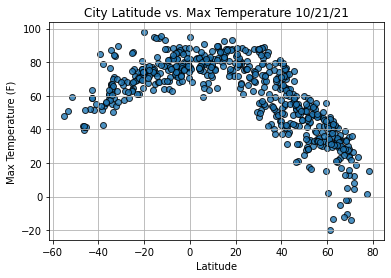

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

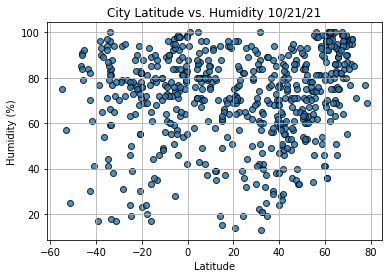

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## Plot Latitud vs. Cloudiness

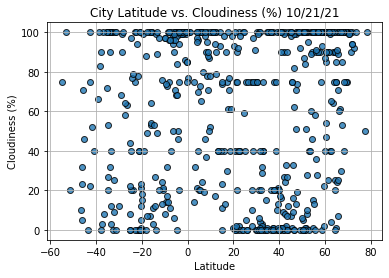

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

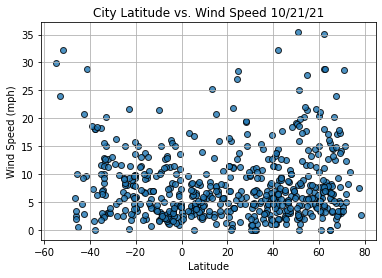

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Find the Correlation Between Latitude and Maximum Temperature

## Create a Linear Regression Function

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Create a Hemisfere DataFrames

In [46]:
index13=city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-10-21 19:11:32
Lat                        -33.65
Lng                       115.333
Max Temp                    50.09
Humidity                       84
Cloudiness                     40
Wind Speed                   6.31
Name: 13, dtype: object

In [48]:
# FILTER all Northern Hemisphere latitudes, for latitudes greater than or equal to 0,
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
582     True
583     True
584     True
585    False
586    False
Name: Lat, Length: 587, dtype: bool

In [51]:
#return a DataFrame with all data fitting the criteria,
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kihei,US,2021-10-21 19:14:05,20.7850,-156.4656,83.46,72,40,6.91
3,Thompson,CA,2021-10-21 19:11:32,55.7435,-97.8558,34.12,71,100,5.66
4,San Patricio,US,2021-10-21 19:13:04,28.0170,-97.5169,88.02,50,10,5.84
5,Praya,CV,2021-10-21 19:16:25,14.9215,-23.5087,82.94,61,0,20.71
6,Matamoros,MX,2021-10-21 19:14:47,25.5333,-103.2500,86.11,32,75,4.61


In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df= city_data_df.loc[(city_data_df['Lat'])>=0]
southern_hemi_df=city_data_df.loc[(city_data_df['Lat'])<=0]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

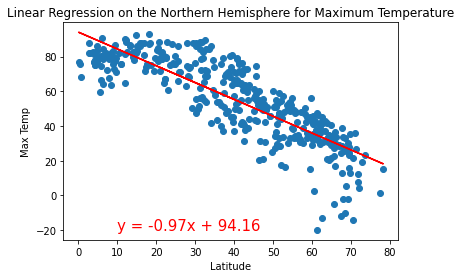

In [74]:
#CALLING the function previously defined
# Linear regression on the Northern Hemisphere
# This means than the more we approach to the the Ecuator the warmer the Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere '\
                        'for Maximum Temperature', 'Max Temp',(10,-20))

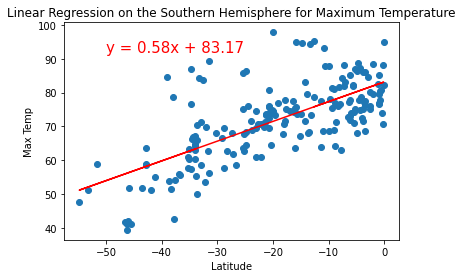

In [81]:
# Linear regression on the Southern Hemisphere
# This means than the more we approach to the the Ecuator the warmer the Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere '\
                        'for Maximum Temperature', 'Max Temp',(-50,92))

## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

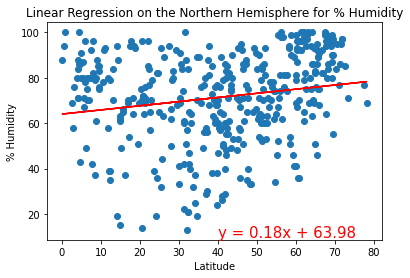

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere ' \
                        'for % Humidity', '% Humidity',(40,10))

## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

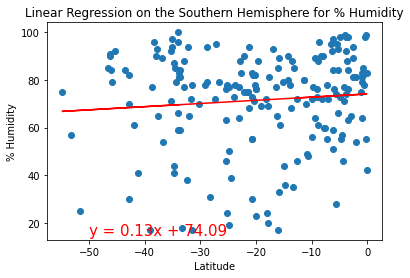

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere ' \
                        'for % Humidity', '% Humidity',(-50,15))

## Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

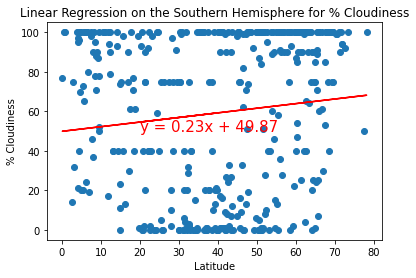

In [100]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere ' \
                        'for % Cloudiness', '% Cloudiness',(20,50))

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere


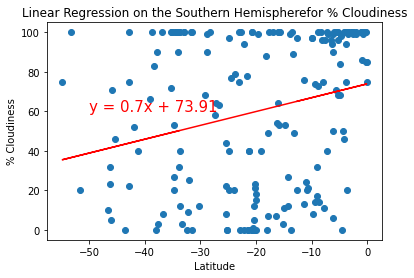

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' \
                        'for % Cloudiness', '% Cloudiness',(-50,60))

# Find the Correlation Between Latitude and Wind Speed

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

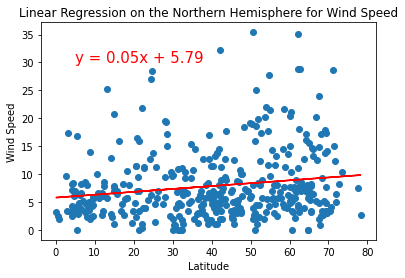

In [126]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere ' \
                        'for Wind Speed', 'Wind Speed',(5,30))

## Perform Linear Regression on the Wind Speed for the Southern Hemisphere


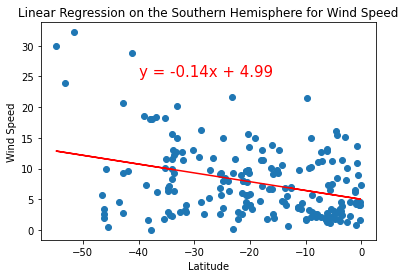

In [140]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere '\
                        'for Wind Speed', 'Wind Speed',(-40,25))